In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from minigrad import Value
from graph_util import draw_dot

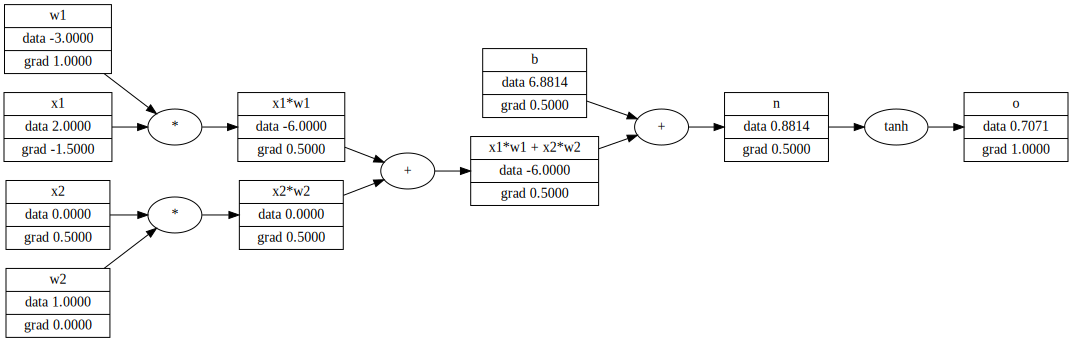

In [2]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label='o'

o.backward()
draw_dot(o)

In [3]:
class Neuron:
    def __init__(self, nin):
        self.w = [Value(np.random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(np.random.uniform(-1, 1))

    def __call__(self, x):
        # w * x + b
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]

class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]


In [4]:
x = [2.0, 3.0, -1]
n = MLP(3, [4, 4, 1])      
n(x)

Value(data=0.92, grad=0.00), operation=tanh

In [5]:
xs = [
    [2, 3, -1],
    [3, -1, 0.5],
    [0.5, 1, 1],
    [1, 1, 1]
     ]

ys = [1, -1, -1, 1] # desired targets

In [6]:
ypred = [n(x) for x in xs]
ypred

[Value(data=0.92, grad=0.00), operation=tanh,
 Value(data=0.73, grad=0.00), operation=tanh,
 Value(data=0.90, grad=0.00), operation=tanh,
 Value(data=0.90, grad=0.00), operation=tanh]

In [7]:
loss = sum((yout-ygt)**2 for ygt, yout in zip(ys, ypred))

In [8]:
loss.backward()

In [9]:
n.layers[0].neurons[0].w[0].grad

-0.10537342277879803

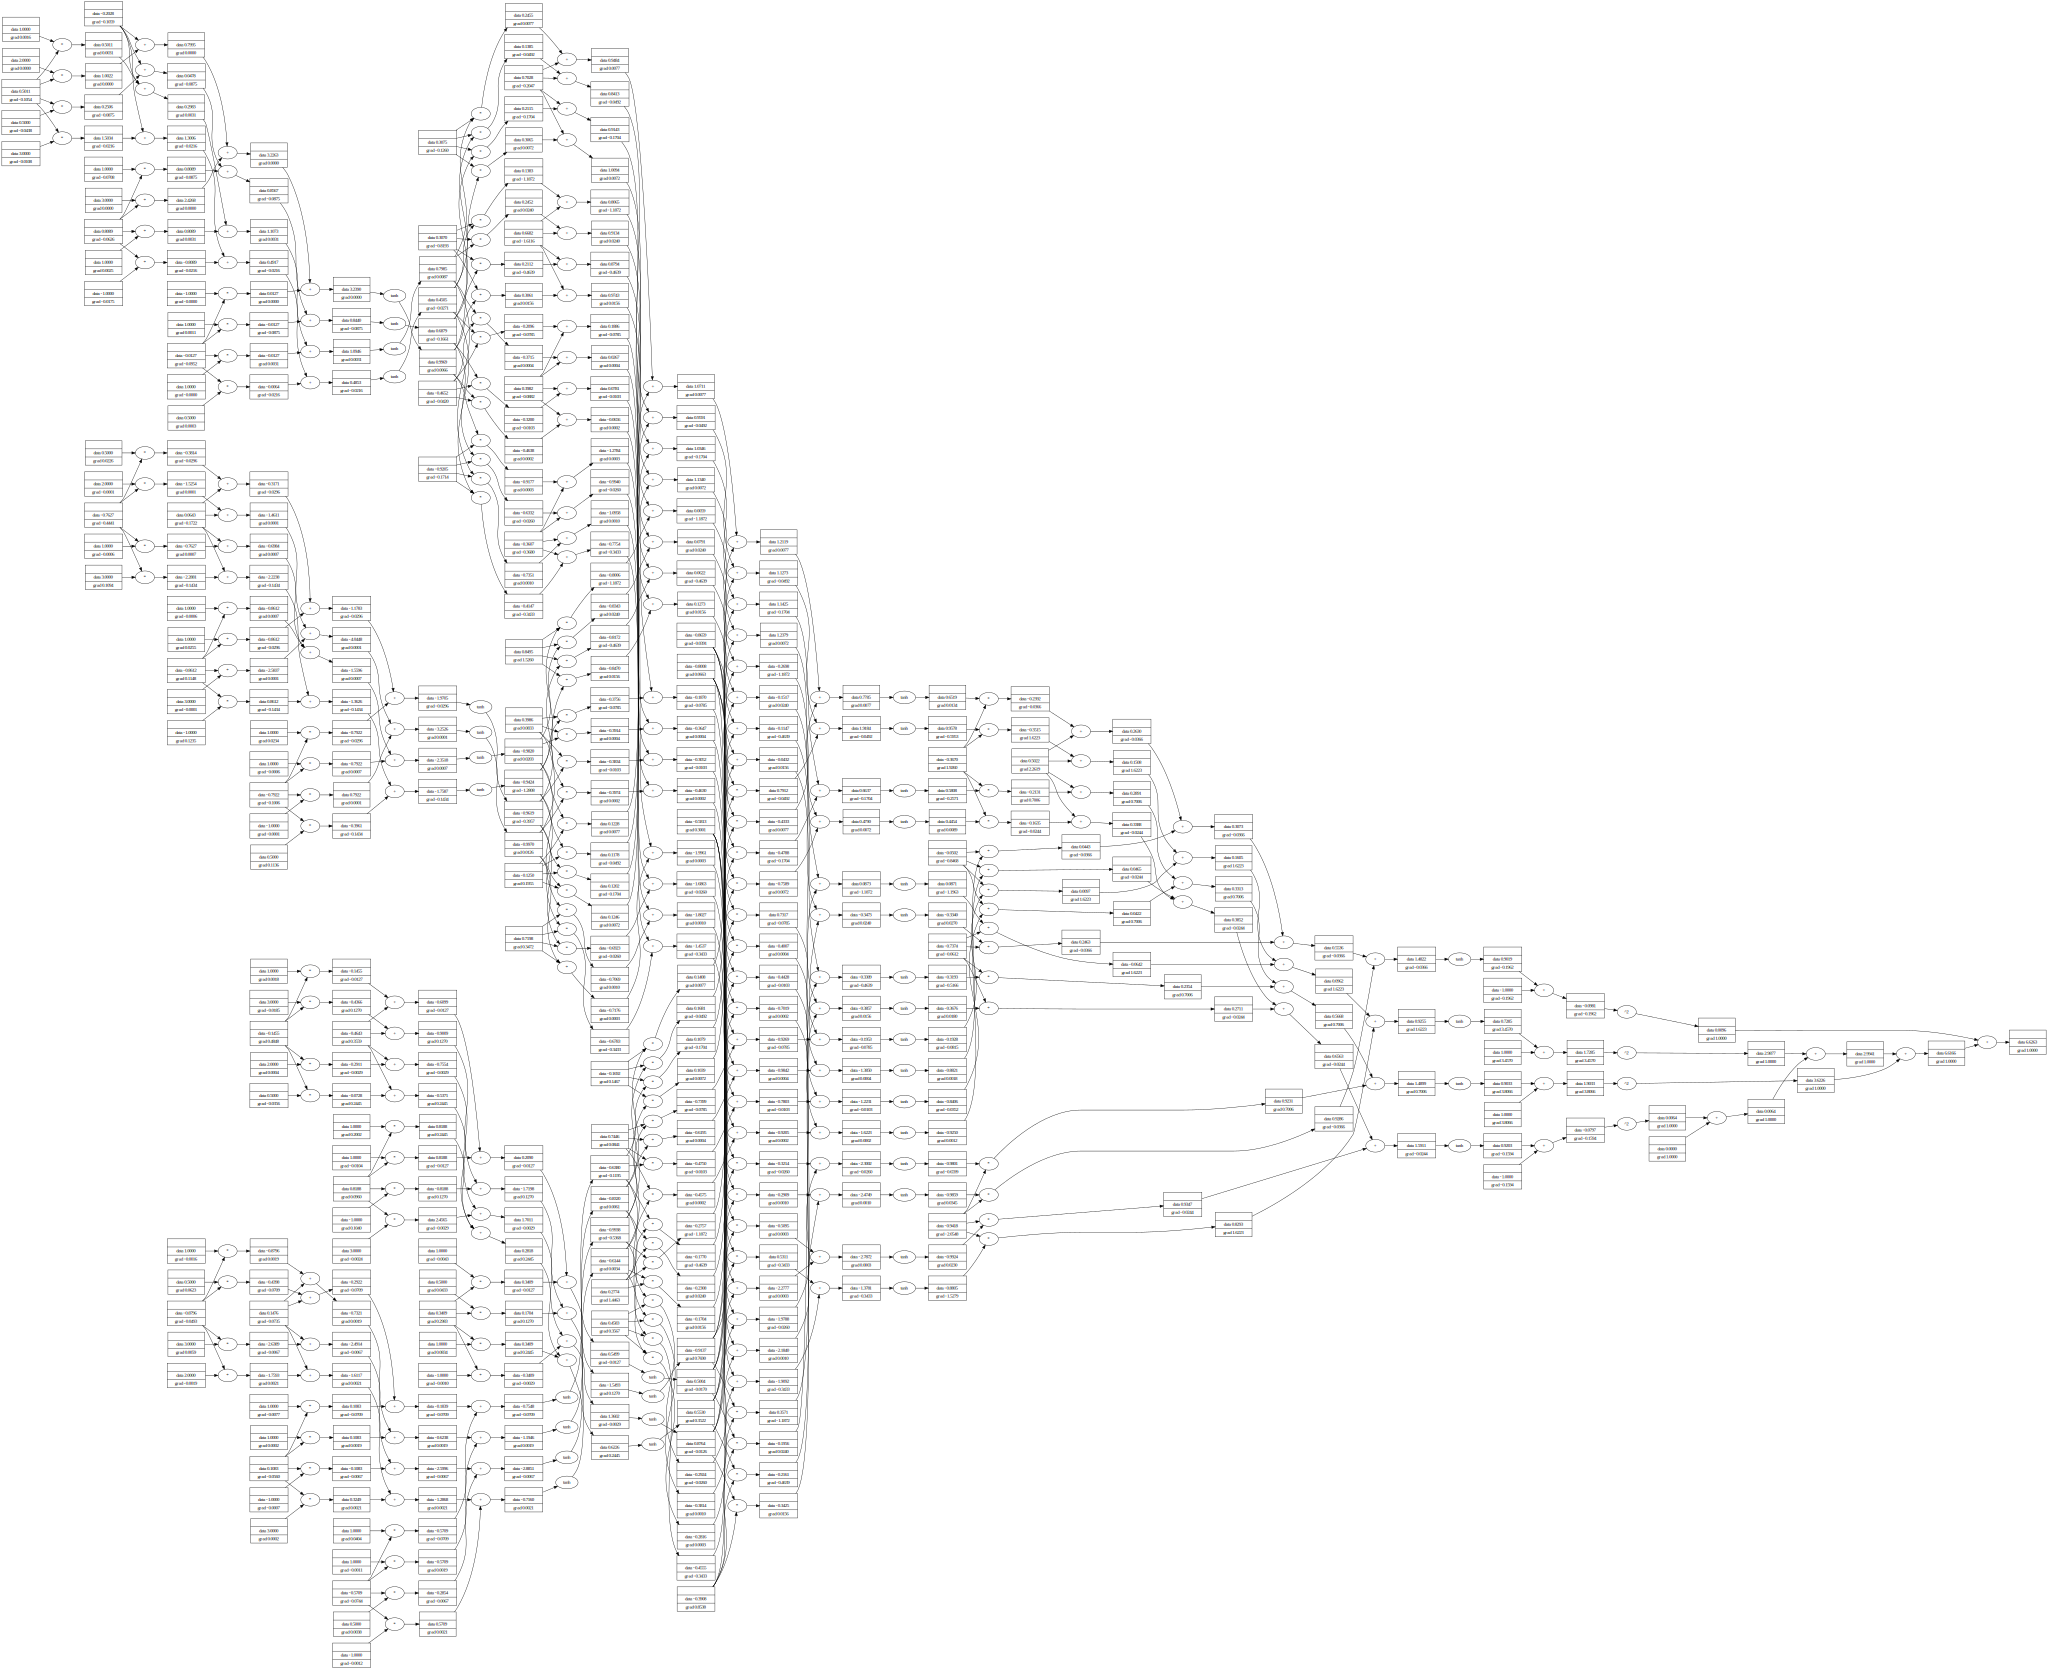

In [10]:
draw_dot(loss)